In [1]:
# Import necessary libraries
import sys
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Add the path where telecom_analysis.py is located
sys.path.append(os.path.abspath('../scripts'))

# Import functions from telecom_analysis.py
# Import the functions from feature_engineering.py
from eda import load_data
from feature_engineering import create_aggregate_features, extract_temporal_features, one_hot_encode
from feature_engineering import label_encode, handle_missing_values, scale_numerical_features



In [2]:
file_path = '../data/data.csv'
df = load_data(file_path)
df.head(2)

# Apply aggregate features
df = create_aggregate_features(df)
# Extract temporal features
df = extract_temporal_features(df)
# Handle missing values
df = handle_missing_values(df, strategy='median')


df.drop(columns=['CountryCode', 'Value'], inplace=True)
categorical_columns = [
    'ProviderId', 'ProductId', 'ProductCategory',
    'TransactionHour', 'TransactionDay', 'TransactionMonth', 'TransactionYear'
]
# categorical_columns = [
#     'TransactionId', 
#     'BatchId', 
#     'AccountId', 
#     'SubscriptionId', 
#     'CustomerId', 
#     'CurrencyCode', 
#     'ProviderId', 
#     'ProductId', 
#     'ProductCategory', 
#     'TransactionHour', 
#     'TransactionDay', 
#     'TransactionMonth', 
#     'TransactionYear'
# ]        
# Numerical columns to scale

numerical_columns = [
    'PricingStrategy',  # Include PricingStrategy if it's numerical
    'TotalTransactionAmount', 
    'AvgTransactionAmount', 
    'TransactionCount', 
    'StdDevTransactionAmount'
]

c:\kifiya-week6\scripts\feature_engineering.py:65: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)


In [14]:
# # One-Hot Encoding the categorical columns
# df = one_hot_encode(df, categorical_columns)

# # # Initialize an empty DataFrame to hold the encoded features
# # encoded_df = pd.DataFrame(index=df.index)

# # for col in categorical_columns:
# #     temp_df = pd.get_dummies(df[col], prefix=col, drop_first=True, sparse=True)
# #     encoded_df = pd.concat([encoded_df, temp_df], axis=1)

# # # Drop original categorical columns from the original DataFrame
# # df.drop(columns=categorical_columns, inplace=True)

# # # Combine the original DataFrame with the new one-hot encoded columns
# # df = pd.concat([df, encoded_df], axis=1)


In [3]:
df = label_encode(df, categorical_columns)

# Apply scaling (choose between 'normalize' and 'standardize')
df = scale_numerical_features(df, numerical_columns, method='standardize')  # Change to 'normalize' if needed

# Ensure that all references to columns are in lowercase
df.columns = df.columns.str.lower()
print(df.columns)

Index(['transactionid', 'batchid', 'accountid', 'subscriptionid', 'customerid',
       'currencycode', 'providerid', 'productid', 'productcategory',
       'channelid', 'amount', 'transactionstarttime', 'pricingstrategy',
       'fraudresult', 'totaltransactionamount', 'avgtransactionamount',
       'transactioncount', 'stddevtransactionamount', 'transactionhour',
       'transactionday', 'transactionmonth', 'transactionyear'],
      dtype='object')


######TTT

In [4]:
import scorecardpy as sc
from monotonic_binning.monotonic_woe_binning import Binning

In [5]:
df.describe()

,providerid,productid,productcategory,amount,pricingstrategy,fraudresult,totaltransactionamount,avgtransactionamount,transactioncount,stddevtransactionamount,transactionhour,transactionday,transactionmonth,transactionyear
count,95662.000000,95662.000000,95662.000000,9.566200e+04,9.566200e+04,95662.000000,9.566200e+04,9.566200e+04,9.566200e+04,9.566200e+04,95662.000000,95662.000000,95662.000000,95662.000000
mean,3.657157,12.388786,1.238726,6.717846e+03,1.342917e-16,0.002018,7.368217e-17,-2.376844e-18,1.901475e-17,-2.614529e-17,11.334197,15.158161,1.370011,0.497115
std,1.309014,7.217021,1.550262,1.233068e+05,1.000005e+00,0.044872,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,6.939985,9.134014,1.107856,0.499994
min,0.000000,0.000000,0.000000,-1.000000e+06,-3.078062e+00,0.000000,-4.646278e+00,-5.038543e+00,-4.461315e-01,-2.017187e-01,0.000000,0.000000,0.000000,0.000000
25%,3.000000,6.000000,0.000000,-5.000000e+01,-3.492524e-01,0.000000,1.678282e-01,-6.368859e-02,-4.108492e-01,-1.656619e-01,6.000000,7.000000,0.000000,0.000000
50%,4.000000,16.000000,2.000000,1.000000e+03,-3.492524e-01,0.000000,1.743188e-01,-5.187601e-02,-3.414227e-01,-1.354443e-01,9.000000,16.000000,2.000000,0.000000
75%,5.000000,19.000000,2.000000,2.800000e+03,-3.492524e-01,0.000000,1.975924e-01,-3.078067e-02,-1.365574e-01,-8.555847e-02,19.000000,23.000000,2.000000,1.000000
max,5.000000,22.000000,8.000000,9.880000e+06,2.379557e+00,1.000000,3.992660e+00,1.003127e+02,4.208861e+00,3.700155e+01,23.000000,30.000000,3.000000,1.000000


#calculates the RFMS scores for each user.
Recency: The number of days since the last transaction (lower values are better).
Frequency: The total number of transactions (higher values are better).
Monetary: The total amount spent by the user (higher values are better).


#function classifies users as "good" or "bad" based on their RFMS scores.

Logic: A median threshold is established:

Users with an RFMS score above the median are labeled as good (1).
Users with an RFMS score below the median are labeled as bad (0).

DataFrame structure after classification:
         transactionid         batchid       accountid       subscriptionid       customerid currencycode  providerid  productid  productcategory    channelid   amount      transactionstarttime  pricingstrategy  fraudresult  totaltransactionamount  avgtransactionamount  transactioncount  stddevtransactionamount  \
0  TransactionId_76871   BatchId_36123  AccountId_3957   SubscriptionId_887  CustomerId_4406          UGX           5          1                0  ChannelId_3   1000.0 2018-11-15 02:18:49+00:00        -0.349252            0                0.170118             -0.067623         -0.311831                -0.167524   
1  TransactionId_73770   BatchId_15642  AccountId_4841  SubscriptionId_3829  CustomerId_4406          UGX           3         19                2  ChannelId_2    -20.0 2018-11-15 02:19:08+00:00        -0.349252            0                0.170118             -0.067623         -0.311831                -0.167524   
2  Transac

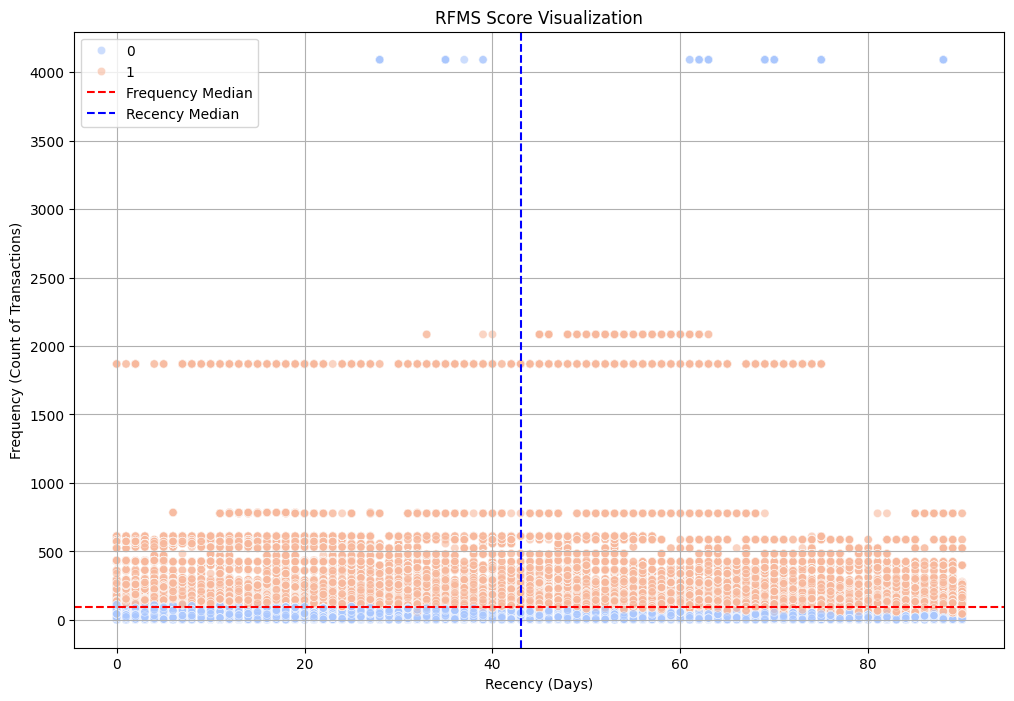

[INFO] creating WoE binning for totaltransactionamount...
[INFO] creating woe binning ...


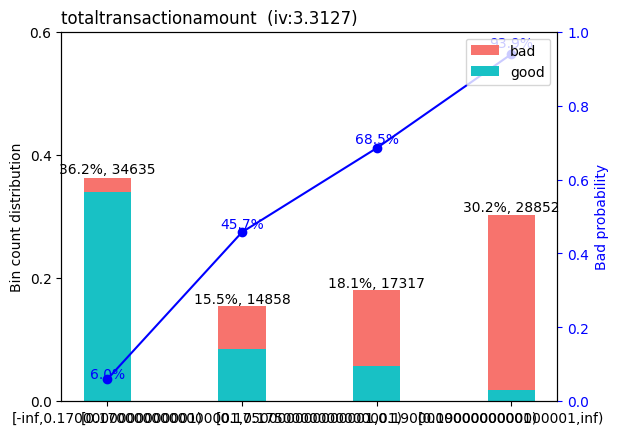

[INFO] creating WoE binning for avgtransactionamount...
[INFO] creating woe binning ...


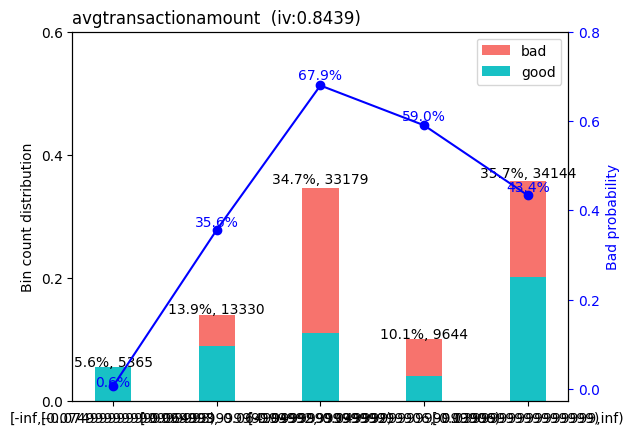

[INFO] creating WoE binning for transactioncount...
[INFO] creating woe binning ...


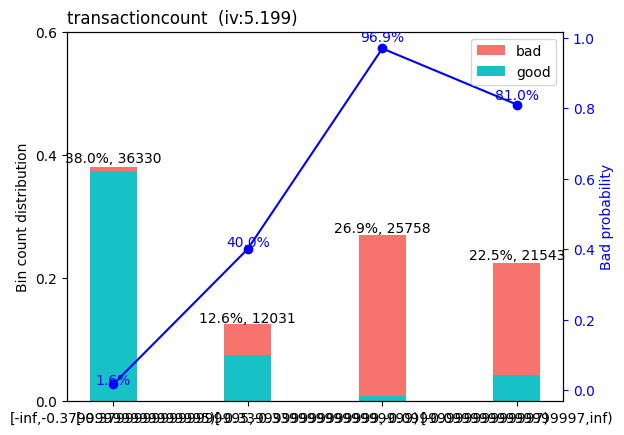

[INFO] creating WoE binning for stddevtransactionamount...
[INFO] creating woe binning ...


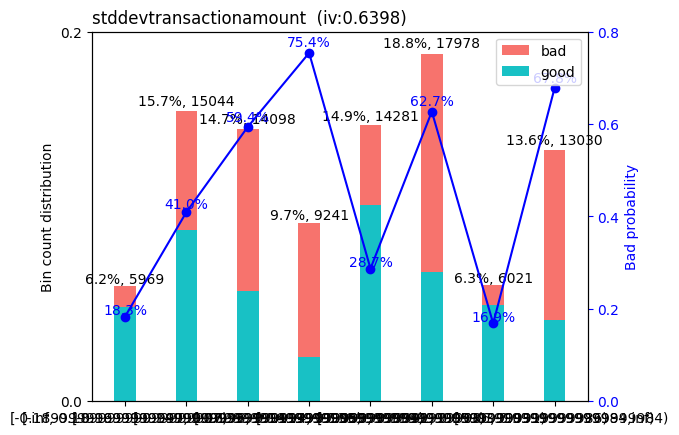

[INFO] creating WoE binning for recency...
[INFO] creating woe binning ...


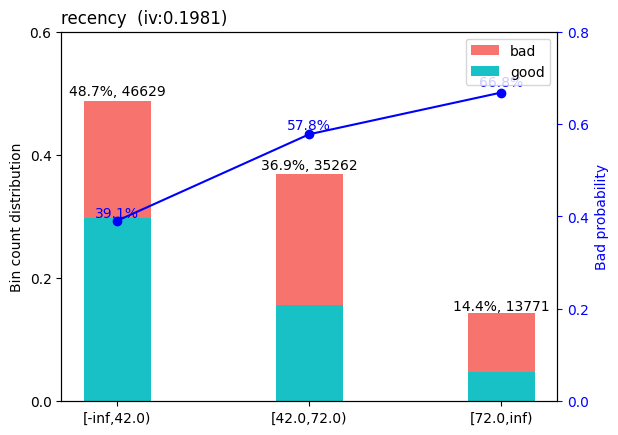

[INFO] creating WoE binning for frequency...
[INFO] creating woe binning ...


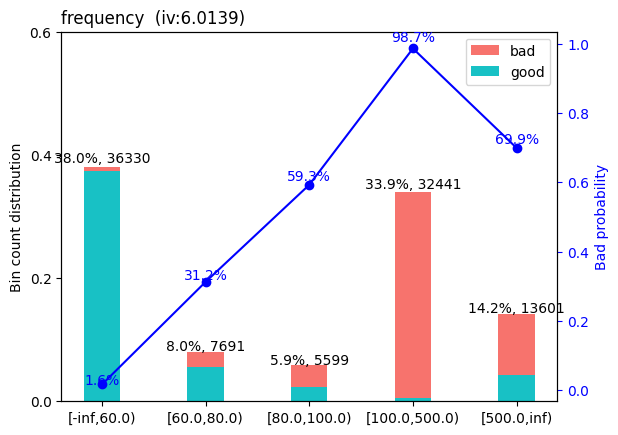

[INFO] creating WoE binning for providerid...
[INFO] creating woe binning ...


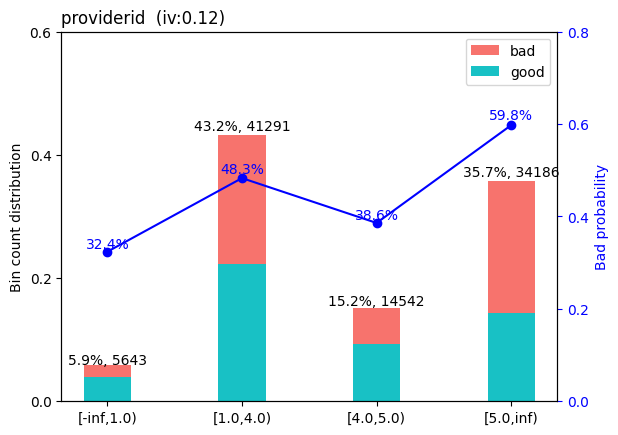

[INFO] creating WoE binning for productid...
[INFO] creating woe binning ...


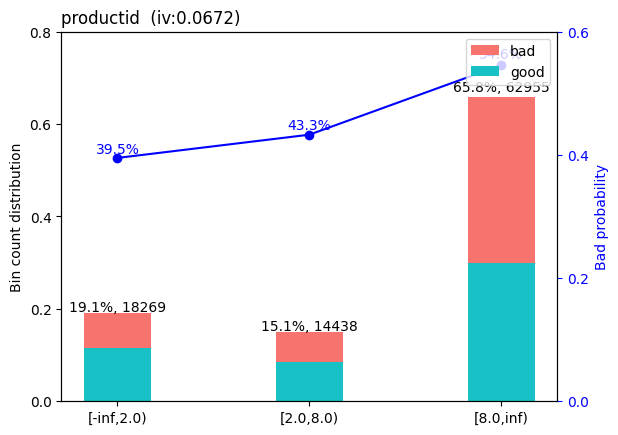

[INFO] creating WoE binning for productcategory...
[INFO] creating woe binning ...


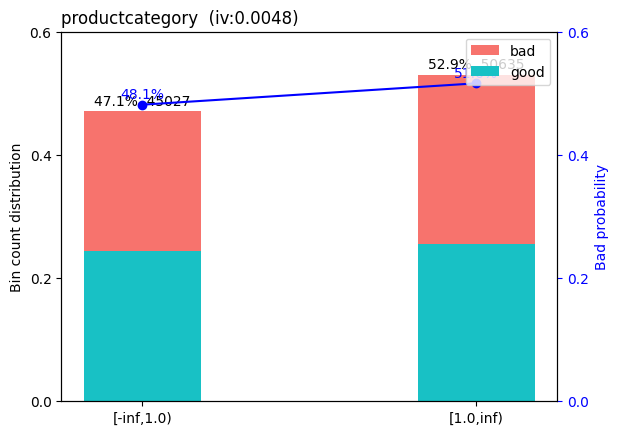

[INFO] creating WoE binning for transactionhour...
[INFO] creating woe binning ...


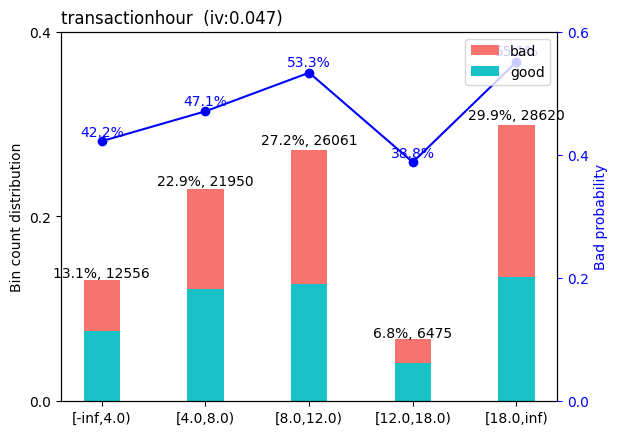

[INFO] creating WoE binning for transactionday...
[INFO] creating woe binning ...


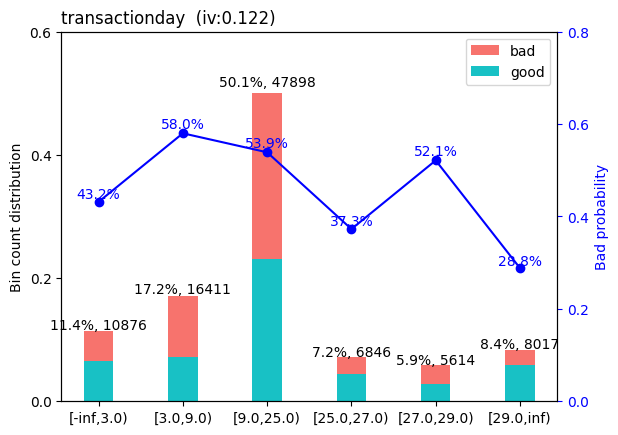

[INFO] creating WoE binning for transactionmonth...
[INFO] creating woe binning ...


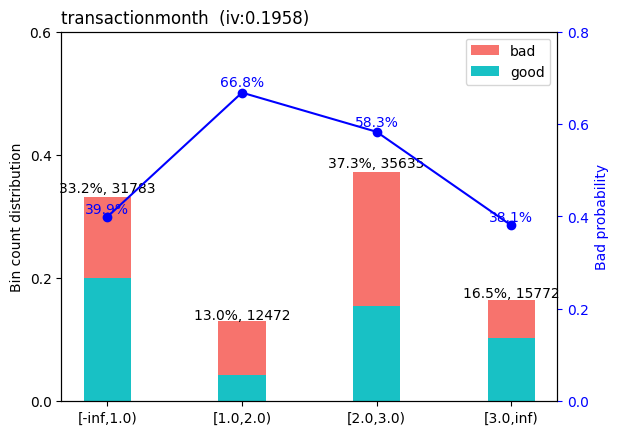

[INFO] creating WoE binning for transactionyear...
[INFO] creating woe binning ...


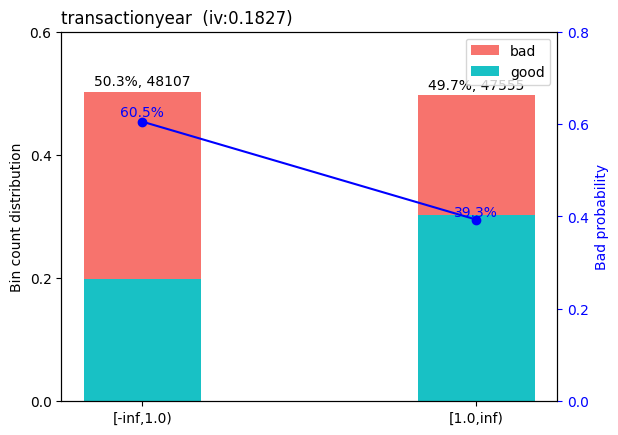

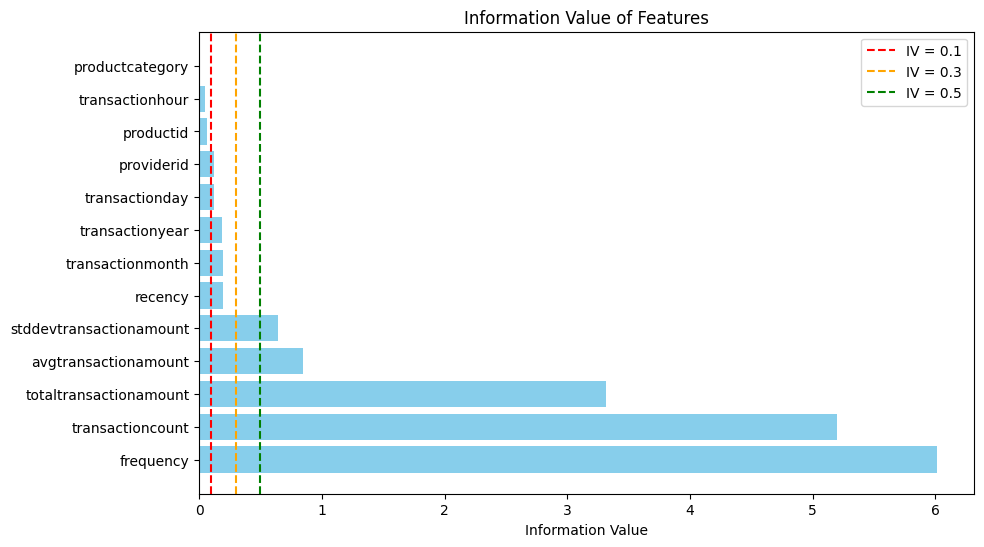

In [6]:
import pandas as pd
import scorecardpy as sc
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Define a function to calculate RFMS scores and classify users
def classify_users_rfms(df):
    df['transactionstarttime'] = pd.to_datetime(df['transactionstarttime'])
    max_date = df['transactionstarttime'].max()
    df['recency'] = (max_date - df['transactionstarttime']).dt.days
    
    # Calculate Frequency
    frequency = df.groupby('customerid')['transactionid'].count().reset_index()
    frequency.columns = ['customerid', 'frequency']
    df = df.merge(frequency, on='customerid', how='left')
    
    # Calculate Monetary
    monetary = df.groupby('customerid')['totaltransactionamount'].sum().reset_index()
    monetary.columns = ['customerid', 'monetary']
    df = df.merge(monetary, on='customerid', how='left')
    
    # Calculate RFMS score
    df['rfms_score'] = df['recency'] + df['frequency'] + df['monetary']
    return df

# Visualization for RFMS Score
def visualize_rfms(df):
    plt.figure(figsize=(12, 8))
    sns.scatterplot(data=df, x='recency', y='frequency', hue='label', palette='coolwarm', alpha=0.6)
    plt.title('RFMS Score Visualization')
    plt.xlabel('Recency (Days)')
    plt.ylabel('Frequency (Count of Transactions)')
    plt.axhline(y=df['frequency'].median(), color='r', linestyle='--', label='Frequency Median')
    plt.axvline(x=df['recency'].median(), color='b', linestyle='--', label='Recency Median')
    plt.legend()
    plt.grid()
    plt.show()

# Function to establish a boundary and assign labels based on RFMS score
def classify_risk(df):
    threshold = df['rfms_score'].median()
    df['label'] = (df['rfms_score'] > threshold).astype(int)  # 1 for good, 0 for bad
    return df

# WoE and IV calculation for numerical features with enhanced error handling
def woe_numerical(numerical_columns, target_col, df, n_threshold=50, y_threshold=10, p_threshold=0.35):
    """Calculate WoE for numerical features."""
    woe_results = {}
    for col in numerical_columns:
        if col not in df.columns:
            print(f"Warning: {col} is not in the DataFrame.")
            continue
        try:
            print(f"[INFO] creating WoE binning for {col}...")
            bin_result = sc.woebin(df, y=target_col, x=[col], n_threshold=n_threshold, y_threshold=y_threshold, p_threshold=p_threshold)
            if isinstance(bin_result, dict) and col in bin_result:
                woe_results[col] = bin_result[col]
                sc.woebin_plot(bin_result[col])  # Plot the WoE results for the feature
                plt.show()  # Show the plot for each feature
        except KeyError as e:
            print(f"Error processing {col}: KeyError - {e}")
        except Exception as e:
            print(f"Error processing {col}: {e}")
    return woe_results

# WoE binning for categorical columns with enhanced error handling
def woe_cat(categorical_columns, target_col, df, n_threshold=50, y_threshold=10, p_threshold=0.35):
    """Calculate WoE for categorical features."""
    woe_results = {}
    for col in categorical_columns:
        if col not in df.columns:
            print(f"Warning: {col} is not in the DataFrame.")
            continue
        try:
            print(f"[INFO] creating WoE binning for {col}...")
            bin_result = sc.woebin(df, y=target_col, x=[col], n_threshold=n_threshold, y_threshold=y_threshold, p_threshold=p_threshold)
            if isinstance(bin_result, dict) and col in bin_result:
                woe_results[col] = bin_result[col]
                sc.woebin_plot(bin_result[col])  # Plot the WoE results for the feature
                plt.show()  # Show the plot for each feature
        except KeyError as e:
            print(f"Error processing {col}: KeyError - {e}")
        except Exception as e:
            print(f"Error processing {col}: {e}")
    return woe_results

# Function to calculate IV from WoE binning results
def calculate_iv(woe_bins, df, target_col):
    """Calculate Information Value from WoE binning results."""
    iv_results = {}
    for col, bin_info in woe_bins.items():
        if 'good' in bin_info and 'bad' in bin_info:
            good_dist = bin_info['good']
            bad_dist = bin_info['bad']
            total_good = good_dist.sum()
            total_bad = bad_dist.sum()

            # Calculate the proportion of goods and bads for each bin
            good_proportion = good_dist / total_good
            bad_proportion = bad_dist / total_bad
            
            # Calculate WoE
            woe = np.log(good_proportion / bad_proportion)

            # Calculate IV
            iv = (good_proportion - bad_proportion) * woe
            iv_results[col] = iv.sum()
    return iv_results

# Function to visualize IV results
def visualize_iv_results(iv_results):
    """Visualize Information Value results."""
    iv_df = pd.DataFrame(list(iv_results.items()), columns=['Feature', 'IV'])
    iv_df = iv_df.sort_values(by='IV', ascending=False)

    # Create a bar plot for IV values
    plt.figure(figsize=(10, 6))
    plt.barh(iv_df['Feature'], iv_df['IV'], color='skyblue')
    plt.xlabel('Information Value')
    plt.title('Information Value of Features')
    plt.axvline(x=0.1, color='red', linestyle='--', label='IV = 0.1')
    plt.axvline(x=0.3, color='orange', linestyle='--', label='IV = 0.3')
    plt.axvline(x=0.5, color='green', linestyle='--', label='IV = 0.5')
    plt.legend()
    plt.show()

# Example usage

# Load your DataFrame (assuming 'df' is your DataFrame)
# Example: df = pd.read_csv('your_data.csv')

df = classify_users_rfms(df)  # Classify users based on RFMS
df = classify_risk(df)  # Classify users as good or bad based on RFMS scores

# Debugging: Print the DataFrame structure to ensure 'label' is created
print("DataFrame structure after classification:")
print(df.head())  # Check the first few rows of the DataFrame

visualize_rfms(df)  # Visualize RFMS space


numerical_columns = [
    'totaltransactionamount', 
    'avgtransactionamount', 
    'transactioncount', 
    'stddevtransactionamount', 
    'recency',  
    'frequency'
]
categorical_columns = [
    'providerid', 'productid', 'productcategory',
    'transactionhour', 'transactionday', 'transactionmonth', 'transactionyear'
]
target_column = 'label'  # Use the label created in classify_risk

# Perform WoE binning for numerical and categorical columns
woe_values_numerical = woe_numerical(numerical_columns, target_column, df)
woe_values_categorical = woe_cat(categorical_columns, target_column, df)

# Merge the WoE results
woe_bins = {**woe_values_numerical, **woe_values_categorical}

# Calculate IV values
iv_values = calculate_iv(woe_bins, df, target_column)

# Visualize IV results
visualize_iv_results(iv_values)


In [7]:
print(iv_values)


{'totaltransactionamount': np.float64(3.312723558093161), 'avgtransactionamount': np.float64(0.8439297587321354), 'transactioncount': np.float64(5.198966118333814), 'stddevtransactionamount': np.float64(0.639824545285416), 'recency': np.float64(0.19813906953713945), 'frequency': np.float64(6.013886681139963), 'providerid': np.float64(0.12001534163936868), 'productid': np.float64(0.06717089176308194), 'productcategory': np.float64(0.004800536465210765), 'transactionhour': np.float64(0.04703816220279584), 'transactionday': np.float64(0.12200284988908416), 'transactionmonth': np.float64(0.19584481248530206), 'transactionyear': np.float64(0.18265744667144973)}


In [12]:
import pandas as pd
import scorecardpy as sc


# Calculate Information Value (IV)
iv_results = sc.iv(df, y='label')
print("Information Value (IV) Results:")
print(iv_results)

# Filter variables using the correct parameters for var_filter
filtered_vars = sc.var_filter(df, y='label')  # Maximum identical value rate allowed

print("Filtered Variables:")
print(filtered_vars)


Information Value (IV) Results:
                   variable  info_value
6                 frequency   10.493208
9          transactioncount   10.493208
12   totaltransactionamount    8.772814
7      avgtransactionamount    8.575190
0                  monetary    8.382191
1   stddevtransactionamount    8.358616
18               customerid    7.862147
23                accountid    4.515308
11           subscriptionid    4.408941
17               rfms_score    3.619715
3                    amount    0.875216
21                  recency    0.488890
14           transactionday    0.227850
22          pricingstrategy    0.225927
4          transactionmonth    0.195845
13          transactionyear    0.182657
2                providerid    0.122503
8                 productid    0.096626
15          transactionhour    0.057721
5                   batchid    0.022860
24          productcategory    0.019628
16     transactionstarttime    0.018478
19            transactionid    0.011091
25      

TypeError: var_filter() got an unexpected keyword argument 'iv'

In [11]:
filtered_vars = sc.var_filter(df, y='label', 
                               iv=0.1,              # Minimum IV to retain
                               missing_rate=0.05,   # Maximum missing rate allowed
                               identical_value_rate=0.95)  # Maximum identical value rate allowed

print("Filtered Variables:")
print(filtered_vars)

TypeError: var_filter() got an unexpected keyword argument 'iv'

In [8]:
df.to_csv('processed_data.csv', index=False)

########################function`